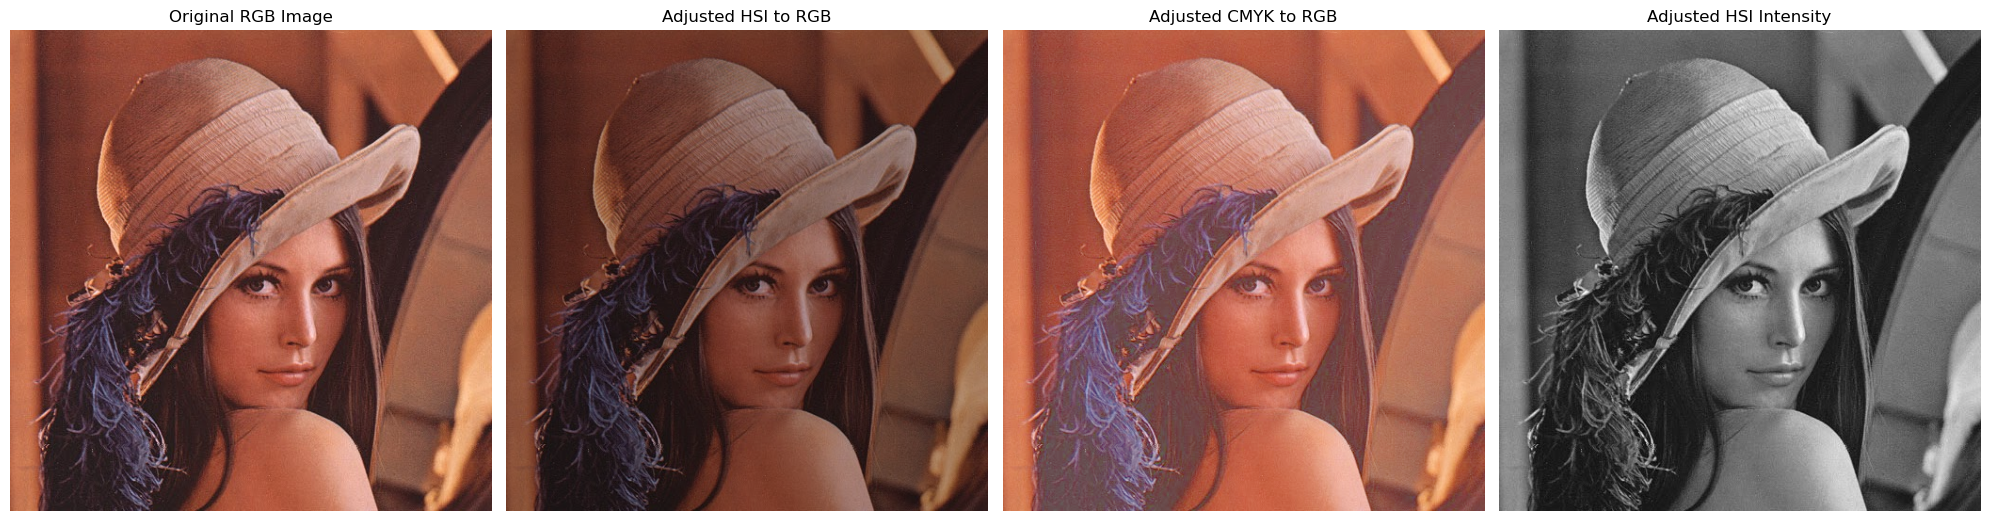

In [13]:
"""
Color Transformation Overview:

Color transformation is a fundamental process in image processing where an image is converted 
from one color space to another. Different color spaces, such as RGB, HSI, and CMYK, are 
designed to represent color information in unique ways suited to specific applications:

1. **RGB (Red, Green, Blue):**
   - Represents color as a combination of three primary colors.
   - Commonly used in digital screens and cameras.
   - In this program, we use RGB as the base format for the input image.

2. **HSI (Hue, Saturation, Intensity):**
   - Represents color in terms of human perception:
     - Hue: Represents the type of color (e.g., red, green, blue).
     - Saturation: Represents the vividness or purity of the color.
     - Intensity: Represents the brightness of the color.
   - Useful in applications involving image enhancement and segmentation.

3. **CMYK (Cyan, Magenta, Yellow, Key/Black):**
   - Commonly used in printing systems.
   - Represents color as a mixture of cyan, magenta, yellow, and black ink.
   - Helps optimize color adjustments for printed media.

This program demonstrates:
- Converting an image from RGB to HSI and CMYK color spaces.
- Adjusting intensity in HSI and CMYK.
- Converting the adjusted color spaces back to RGB for visualization.

The transformations allow for targeted image adjustments and visualization 
to suit different application requirements.
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = './data/images/lena_color.jpg'  # Update with your image path
image = Image.open(image_path)

# Convert image to RGB (if not already in RGB)
rgb_image = image.convert('RGB')
rgb_array = np.array(rgb_image)

# Function to convert RGB to HSI
def rgb_to_hsi(rgb):
    r, g, b = rgb / 255.0
    intensity = (r + g + b) / 3.0
    min_rgb = min(r, g, b)
    saturation = 1 - (3 * min_rgb) / (r + g + b + 1e-6)
    num = 0.5 * ((r - g) + (r - b))
    denom = np.sqrt((r - g) ** 2 + (r - b) * (g - b)) + 1e-6
    hue = np.arccos(num / denom)
    if b > g:
        hue = 2 * np.pi - hue
    hue = hue * 180 / np.pi  # Convert radians to degrees
    return np.array([hue, saturation, intensity])

# Convert RGB image to HSI
hsi_image = np.apply_along_axis(rgb_to_hsi, 2, rgb_array)

# Function to adjust intensity in HSI
def adjust_intensity_hsi(hsi_image, factor=0.7):
    hsi_image[:, :, 2] *= factor
    hsi_image[:, :, 2] = np.clip(hsi_image[:, :, 2], 0, 1)
    return hsi_image

# Apply intensity adjustment to HSI
hsi_adjusted = adjust_intensity_hsi(hsi_image.copy())

# Function to convert RGB to CMYK
def rgb_to_cmyk(rgb):
    r, g, b = rgb / 255.0
    k = 1 - max(r, g, b)
    c = (1 - r - k) / (1 - k + 1e-6)
    m = (1 - g - k) / (1 - k + 1e-6)
    y = (1 - b - k) / (1 - k + 1e-6)
    return np.array([c, m, y, k])

# Convert RGB image to CMYK
cmyk_image = np.apply_along_axis(rgb_to_cmyk, 2, rgb_array)

# Function to adjust intensity in CMYK
def adjust_intensity_cmyk(cmyk_image, factor=0.7):
    cmyk_image[:, :, 3] *= factor
    cmyk_image[:, :, 3] = np.clip(cmyk_image[:, :, 3], 0, 1)
    return cmyk_image

# Apply intensity adjustment to CMYK
cmyk_adjusted = adjust_intensity_cmyk(cmyk_image.copy())

# Convert HSI back to RGB
def hsi_to_rgb(hsi):
    h, s, i = hsi
    h = h * np.pi / 180  # Convert degrees to radians
    if s == 0:  # Grayscale
        r = g = b = i
    else:
        if 0 <= h < 2 * np.pi / 3:
            b = i * (1 - s)
            r = i * (1 + (s * np.cos(h) / np.cos(np.pi / 3 - h)))
            g = 3 * i - (r + b)
        elif 2 * np.pi / 3 <= h < 4 * np.pi / 3:
            h -= 2 * np.pi / 3
            r = i * (1 - s)
            g = i * (1 + (s * np.cos(h) / np.cos(np.pi / 3 - h)))
            b = 3 * i - (r + g)
        else:
            h -= 4 * np.pi / 3
            g = i * (1 - s)
            b = i * (1 + (s * np.cos(h) / np.cos(np.pi / 3 - h)))
            r = 3 * i - (g + b)
    return np.clip([r, g, b], 0, 1) * 255

# Convert adjusted HSI to RGB
hsi_rgb = np.apply_along_axis(hsi_to_rgb, 2, hsi_adjusted)

# Convert CMYK back to RGB
def cmyk_to_rgb(cmyk):
    c, m, y, k = cmyk
    r = 255 * (1 - c) * (1 - k)
    g = 255 * (1 - m) * (1 - k)
    b = 255 * (1 - y) * (1 - k)
    return np.array([r, g, b])

cmyk_rgb = np.apply_along_axis(cmyk_to_rgb, 2, cmyk_adjusted)

# Display the results
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

axes[0].imshow(rgb_array)
axes[0].set_title('Original RGB Image')
axes[0].axis('off')

axes[1].imshow(hsi_rgb.astype(np.uint8))
axes[1].set_title('Adjusted HSI to RGB')
axes[1].axis('off')

axes[2].imshow(cmyk_rgb.astype(np.uint8))
axes[2].set_title('Adjusted CMYK to RGB')
axes[2].axis('off')

axes[3].imshow(hsi_adjusted[:, :, 2], cmap='gray')
axes[3].set_title('Adjusted HSI Intensity')
axes[3].axis('off')

plt.tight_layout()
plt.show()